In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

 Pandas reading the dataset

In [213]:
df = pd.read_csv("clv_data.csv")
df.head(20)

Unnamed: 0  id   age  gender  income  days_on_platform           city  \
0            0   0   NaN    Male  126895              14.0  San Francisco   
1            1   1   NaN    Male  161474              14.0          Tokyo   
2            2   2  24.0    Male  104723              34.0         London   
3            3   3  29.0    Male   43791              28.0         London   
4            4   4  18.0  Female  132181              26.0         London   
5            5   5  23.0    Male   12315              14.0  New York City   
6            6   6   NaN    Male   51679              30.0          Tokyo   
7            7   7   NaN  Female   53341              43.0  San Francisco   
8            8   8  46.0    Male  129157              23.0  New York City   
9            9   9  49.0  Female   76842              19.0          Tokyo   
10          10  10   NaN    Male  159506               7.0  New York City   
11          11  11   NaN    Male  110343              30.0  San Francisco   
12          12  12  12.0    Male  130521              12.0         London   
13          13  13   NaN    Male  105418              13.0          Miami   
14          14  14   NaN    Male   95060               7.0          Tokyo   
15          15  15  31.0  Female  226249              20.0          Miami   
16          16  16  19.0  Female   51434              18.0  New York City   
17          17  17  27.0  Female  177582               2.0         London   
18          18  18  10.0  Female     260              32.0  San Francisco   
19          19  19  32.0  Female   15174              13.0          Tokyo   

    purchases  
0           0  
1           0  
2           1  
3           2  
4           2  
5           0  
6           0  
7           1  
8           0  
9           2  
10          0  
11          1  
12          1  
13          0  
14          1  
15          0  
16          0  
17          0  
18          0  
19          1

In [209]:
df.shape

(5000, 8)

In [214]:
# remove the unnamed column
df.drop(columns=["Unnamed: 0","id"], axis=1, inplace=True)
df.head()

age  gender  income  days_on_platform           city  purchases
0   NaN    Male  126895              14.0  San Francisco          0
1   NaN    Male  161474              14.0          Tokyo          0
2  24.0    Male  104723              34.0         London          1
3  29.0    Male   43791              28.0         London          2
4  18.0  Female  132181              26.0         London          2

In [219]:
df.isna().sum()

age                 2446
gender                 0
income                 0
days_on_platform     141
city                   0
purchases              0
dtype: int64

Let's check for each column the missing dataset.

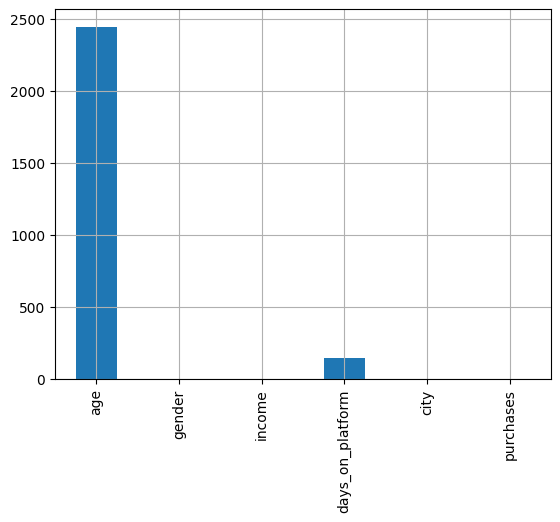

In [217]:
# let's plot the number of NaN values 
df.isna().sum().plot(kind="bar")
plt.grid()

In [231]:
# first is simply remove the missing value 
df_new = df[~df["age"].isna()]
print(df_new.shape)
df_new = df_new[~df["days_on_platform"].isna()]
df_new.shape

(2554, 6)


/var/folders/rw/s894sbjd7tx1dd507lv02bgm0000gn/T/ipykernel_82967/3463127745.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_new = df_new[~df["days_on_platform"].isna()]


(2476, 6)

In [254]:
df["days_on_platform"].median()

21.0

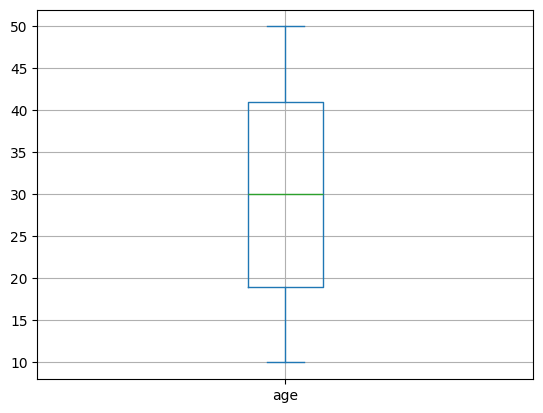

In [237]:
# instead of removing try to impute these value 
# if the distribution is gaussian than use mean if we have more outlier than use median 
# in case of the categorical value we simply impute with strings.
from sklearn.impute import SimpleImputer

df_copy = df.copy()
df_copy["age"].plot(kind="box")
plt.grid()
plt.show()


In [240]:
imputer = SimpleImputer(missing_values=np.nan, strategy="mean")

age = imputer.fit_transform(df_copy[["age"]])
age

array([[30.20203602],
       [30.20203602],
       [24.        ],
       ...,
       [30.20203602],
       [30.20203602],
       [30.20203602]])

In [242]:
df_copy["age"] = pd.DataFrame(age)

In [243]:
df_copy.head()

age  gender  income  days_on_platform           city  purchases
0  30.202036    Male  126895              14.0  San Francisco          0
1  30.202036    Male  161474              14.0          Tokyo          0
2  24.000000    Male  104723              34.0         London          1
3  29.000000    Male   43791              28.0         London          2
4  18.000000  Female  132181              26.0         London          2

In [244]:
df_copy.isna().sum()

age                   0
gender                0
income                0
days_on_platform    141
city                  0
purchases             0
dtype: int64

In [245]:
df_copy.shape

(5000, 6)

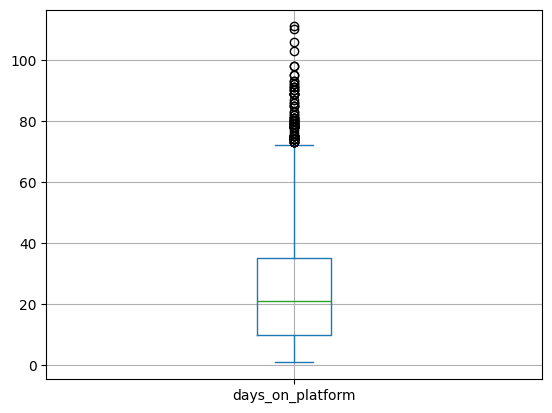

In [114]:
df_copy["days_on_platform"].plot(kind="box")
plt.grid()
plt.show()

In [246]:
imputer = SimpleImputer(missing_values=np.nan, strategy="median")
days_on_platform = imputer.fit_transform(df_copy[["days_on_platform"]])

df_copy["days_on_platform"] = pd.DataFrame(days_on_platform)



In [247]:
df_copy.isna().sum()

age                 0
gender              0
income              0
days_on_platform    0
city                0
purchases           0
dtype: int64

How to handle outliers

<ul>
<li> 25 percentile - (1.5 * iqr) -> lower bound  </li>
<li>75 percentile + (1.5 * iqr) -> uper bound</li>
</ul>

In [259]:
def InterQuantileRange(data):
    percentile_25 = np.percentile(data, 25)
    percentile_75 = np.percentile(data, 75)

    IQR = percentile_75 - percentile_25 # standar formula

    lwr_bound = percentile_25 - (1.5*IQR)
    upr_bound = percentile_75 + (1.5*IQR)

    return lwr_bound, upr_bound


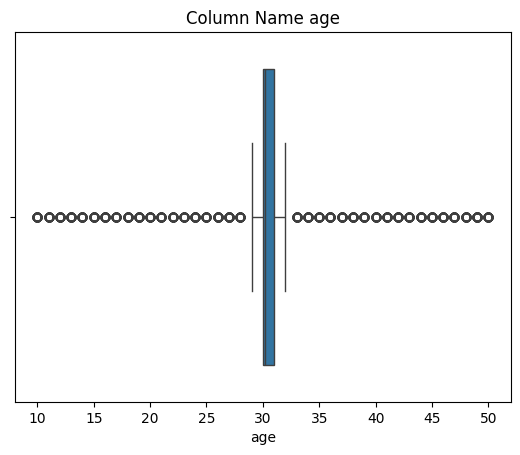

In [261]:
# check which column has outliers.

def BoxPlot(data, columname):
    sns.boxplot(x="age", data=data)
    plt.title(f"Column Name {columname}")
    plt.show()

BoxPlot(df_copy, "age")

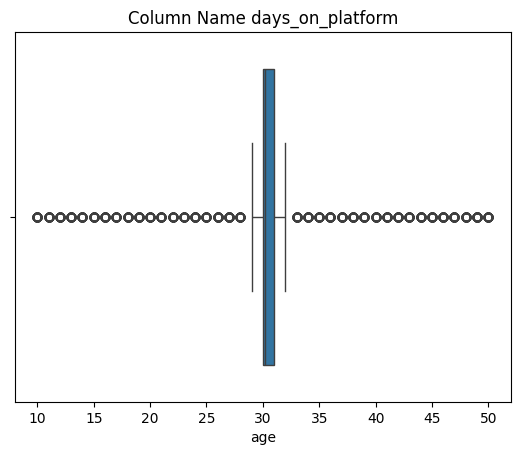

In [262]:
BoxPlot(df_copy, "days_on_platform")

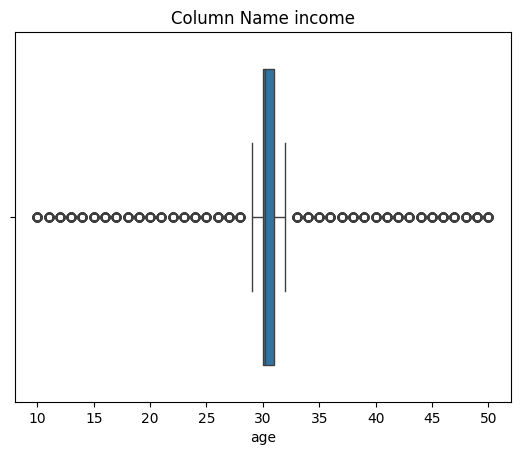

In [263]:
BoxPlot(df_copy, "income")

In [264]:
lwr_bound, upr_bound = InterQuantileRange(df_copy["age"].values)
lwr_bound, upr_bound

(28.5, 32.5)

In [265]:
df_copy.loc[df_copy["age"] < lwr_bound, "age"] = lwr_bound
df_copy.loc[df_copy["age"] > upr_bound, "age"] = upr_bound

# we can do for 
df_copy.loc[df_copy["days_on_platform"] < lwr_bound, "days_on_platform"] = lwr_bound
df_copy.loc[df_copy["days_on_platform"] > upr_bound, "days_on_platform"] = upr_bound

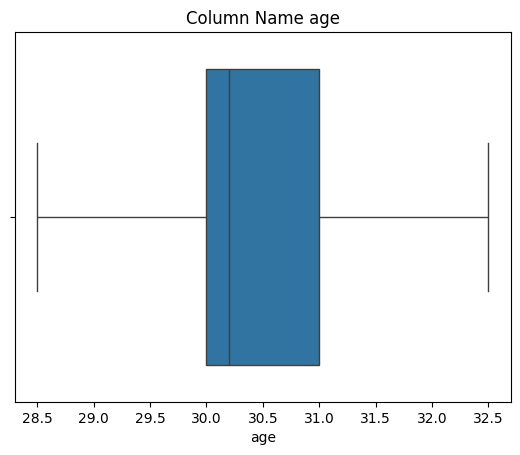

In [266]:
BoxPlot(df_copy, "age")

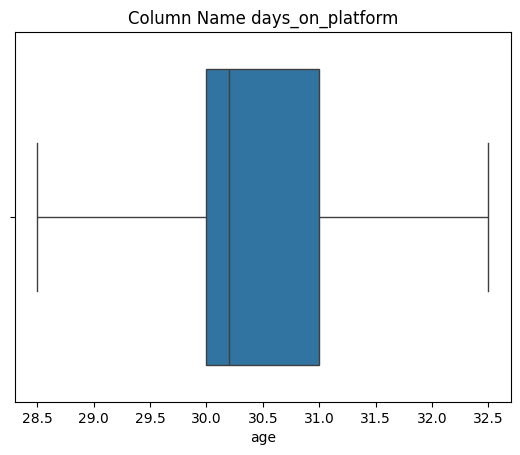

In [267]:
BoxPlot(df_copy, "days_on_platform")

Deal with text data

In [275]:
from collections import Counter
# 1. TF-IDF 
corpus = [
    "hello world how are you doing everything is ok! hello i am doing great, and everything is ok",
    "I like the movie john wick and i is want to rewatch it again!, i like movie of david",
    "You don't like the way you look, that's pretty is sad to me!, I like the way i look but i don't like the way you look"
]

d = corpus[0] # small d from overall documents
total_number_of_words = len(d.split())
all_terms = Counter(d.split())

term_frequency = dict()
for term, occur in all_terms.items():
    term_frequency[term] = occur/total_number_of_words

term_frequency # issue with term frequency is if we have words like is, the, a gonna occur more hence term frequency is gonna be more, hence
# just computing the term frequency is not enough, we need to compute the inverse document frequency

{'hello': 0.1111111111111111,
 'world': 0.05555555555555555,
 'how': 0.05555555555555555,
 'are': 0.05555555555555555,
 'you': 0.05555555555555555,
 'doing': 0.1111111111111111,
 'everything': 0.1111111111111111,
 'is': 0.1111111111111111,
 'ok!': 0.05555555555555555,
 'i': 0.05555555555555555,
 'am': 0.05555555555555555,
 'great,': 0.05555555555555555,
 'and': 0.05555555555555555,
 'ok': 0.05555555555555555}

In [276]:
# idf = log(N(number of document D)/number of document D/with term t)
tf_idf = dict()
for term, value in all_terms.items():
    term_all_docs = list(filter(lambda x: term in x , corpus)) # we check for given word in how many document it occur in total 
    idf = np.log10(len(corpus)/len(term_all_docs))# once we have the idf we can perform the tf-idf = tf*idf 
    tf_idf[term] = term_frequency[term] * idf

tf_idf

{'hello': 0.05301347274662915,
 'world': 0.026506736373314577,
 'how': 0.026506736373314577,
 'are': 0.026506736373314577,
 'you': 0.009782847725315624,
 'doing': 0.05301347274662915,
 'everything': 0.05301347274662915,
 'is': 0.0,
 'ok!': 0.026506736373314577,
 'i': 0.0,
 'am': 0.026506736373314577,
 'great,': 0.026506736373314577,
 'and': 0.009782847725315624,
 'ok': 0.009782847725315624}

We are going to use tf-idf library from sklearn to compute it

In [278]:
from sklearn.feature_extraction.text  import TfidfVectorizer

tf_idf = TfidfVectorizer()
arr = tf_idf.fit_transform(np.array(corpus)).toarray()

In [279]:
arr

array([[0.        , 0.20605592, 0.15671084, 0.20605592, 0.        ,
        0.        , 0.41211185, 0.        , 0.41211185, 0.20605592,
        0.41211185, 0.20605592, 0.2433999 , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.41211185, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.20605592, 0.15671084],
       [0.24695029, 0.        , 0.18781206, 0.        , 0.        ,
        0.24695029, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.14585282, 0.24695029, 0.24695029,
        0.37562412, 0.        , 0.        , 0.49390058, 0.24695029,
        0.        , 0.        , 0.24695029, 0.        , 0.        ,
        0.18781206, 0.18781206, 0.24695029, 0.        , 0.24695029,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.15154296,
        0.        , 0.        , 0.30308593, 0.    

Tokenizer : The idea is nothing but to split the sentence into words, or words into characters.

In [206]:
# for example given the corpus we have the idea of tokenization is to split them 
for cor in corpus:
    print(cor.split())
# we have better strategies to split these sentences, but the core idea will remain the same for all

['hello', 'world', 'how', 'are', 'you', 'doing', 'everything', 'is', 'ok!', 'hello', 'i', 'am', 'doing', 'great,', 'and', 'everything', 'is', 'ok']
['I', 'like', 'the', 'movie', 'john', 'wick', 'and', 'i', 'is', 'want', 'to', 'rewatch', 'it', 'again!,', 'i', 'like', 'movie', 'of', 'david']
['You', "don't", 'like', 'the', 'way', 'you', 'look', 'is,', "that's", 'pretty', 'sad', 'to', 'me!,', 'I', 'like', 'the', 'way', 'i', 'look', 'but', 'i', "don't", 'like', 'the', 'way', 'you', 'look']


 Bag of words 

In [283]:
unique_words = list(set(" ".join(corpus).split()))

df= pd.DataFrame(columns=["unique_words", "corpus0", "corpus1","corpus2"])

for idx, cor in enumerate(corpus):
    occurance = Counter(cor.split())
    total_match = []
    for word in unique_words:
        # i want to counter number of time this word occur in the corpus for first and second sentence
        total_match.append(occurance[word])
    
    df[f"corpus{idx}"]=total_match

df["unique_words"] = unique_words

In [289]:
# BOW
df[["corpus0", "corpus1", "corpus2"]].values.T


array([[2, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 2, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 2, 2, 1, 0, 0, 1, 0, 0, 0, 1, 0],
       [0, 1, 2, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 0, 2, 1, 0, 0, 2, 1, 0, 0],
       [0, 0, 2, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 3, 0, 2, 0, 0, 0, 0, 2, 0,
        1, 1, 3, 0, 0, 1, 0, 3, 1, 0, 1, 0, 0, 0, 2]])

In [201]:
# using sklearn library to compute the BOW 
from sklearn.feature_extraction.text import CountVectorizer

bagofwords = CountVectorizer(ngram_range=(1,1))
bagofwords.fit_transform(corpus).toarray()

array([[0, 1, 1, 1, 0, 0, 2, 0, 2, 1, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
       [1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 0, 0, 2, 1, 0, 0,
        1, 0, 0, 1, 1, 1, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 3, 3, 1, 0, 0, 0, 1,
        0, 1, 1, 3, 1, 0, 3, 0, 0, 3]])

In [203]:
bagofwords.get_feature_names_out()

array(['again', 'am', 'and', 'are', 'but', 'david', 'doing', 'don',
       'everything', 'great', 'hello', 'how', 'is', 'it', 'john', 'like',
       'look', 'me', 'movie', 'of', 'ok', 'pretty', 'rewatch', 'sad',
       'that', 'the', 'to', 'want', 'way', 'wick', 'world', 'you'],
      dtype=object)

Vocabulary Construction concept of padding, truncation.